# A/B testing Igneous Geochemistry Data

### Import scientific python libraries

Including the seaborn library that we will be using for the first time today.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Visualizing distributions of data and comparing populations

Today we are going to move to dealing with a different type of data -- igneous geochemistry data. Igneous rocks are those that crystallize from cooling magma. Different magmas have different compositions associated with their origin. During class today, we will focuse on data from lava flows (these are called volcanics rocks).

There is a big database of geochemical data from rocks called Earthchem: https://www.earthchem.org

### Import a dataframe of igneous geochemistry data

Let's deal with a subset of data from Earthchem that contains geochemical data from igneous rocks. In the data folder in a file calles `ign.csv` although it is actually tab-separated. It comes from here: https://github.com/brenhinkeller/StatisticalGeochemistry

In [2]:
igneous_data = pd.read_csv('./data/ign.csv',sep='\t')

/Users/ddreger/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Let's look at what data are available.

In [9]:
igneous_data.columns
#igneous_data.head()

Index(['ID', 'SAMPLE ID', 'SOURCE', 'REFERENCE', 'LOCALITY', 'METHODS',
       'MATERIAL', 'TYPE', 'COMPOSITION', 'ROCK NAME', 'ID.1', 'LATITUDE',
       'LONGITUDE', 'LOC PREC', 'MIN AGE', 'MAX AGE', 'AGE', 'SIO2', 'TIO2',
       'AL2O3', 'FE2O3', 'FE2O3T', 'FEO', 'FEOT', 'MGO', 'CAO', 'NA2O', 'K2O',
       'P2O5', 'MNO', 'H2O_TOTAL', 'LA', 'CE', 'PR', 'ND', 'SM', 'EU', 'GD',
       'TB', 'DY', 'HO', 'ER', 'TM', 'YB', 'LU', 'LI', 'BE', 'B', 'C', 'CO2',
       'F', 'CL', 'SC', 'TI', 'V', 'CR', 'CO', 'NI', 'CU', 'ZN', 'GA', 'ZR',
       'OS', 'RB', 'BI', 'HG', 'BA', 'Y', 'PB', 'TE', 'NB', 'SR87_SR86', 'TL',
       'PT', 'SN', 'CD', 'AS', 'PD', 'SR', 'SE', 'S', 'AU', 'TA', 'MO', 'U',
       'CS', 'SB', 'AG', 'W', 'TH', 'RE', 'HF', 'IR'],
      dtype='object')

Lots of different geochemical data. Note that the major elements are given as weight percent and the the minor elements are parts per million (ppm).

## Filter to look at volcanics

Let's make it so that we are only dealing with the data from volcanic rocks.

In [8]:
volcanic_data = igneous_data[igneous_data['MATERIAL']=='IGNEOUS']
volcanic_data.head()

,ID,SAMPLE ID,SOURCE,REFERENCE,LOCALITY,METHODS,MATERIAL,TYPE,COMPOSITION,ROCK NAME,ID.1,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,MAX AGE,AGE,SIO2,TIO2,AL2O3,FE2O3,FE2O3T,FEO,FEOT,MGO,CAO,NA2O,K2O,P2O5,MNO,H2O_TOTAL,LA,CE,PR,ND,SM,EU,GD,TB,DY,HO,ER,TM,YB,LU,LI,BE,B,C,CO2,F,CL,SC,TI,V,CR,CO,NI,CU,ZN,GA,ZR,OS,RB,BI,HG,BA,Y,PB,TE,NB,SR87_SR86,TL,PT,SN,CD,AS,PD,SR,SE,S,AU,TA,MO,U,CS,SB,AG,W,TH,RE,HF,IR
0,KV68702,D102672,USGS,"USGS, 2004",NaN,UNKNOWN,IGNEOUS,VOLCANIC,MAFIC,BASALT,68702,19.25,-155.13,0.01,0.0,0.01,0.01,49.97,2.57,13.11,1.83,12.49892,9.60,NaN,9.06,10.58,2.24,0.47,0.26,0.17,NaN,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,0.02,0.04,0.01,50.00,1.00,500.0,500.0,50.00,200.0,150.0,NaN,30.0,150.0,NaN,NaN,NaN,NaN,150.0,50.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KV68701,W256427,USGS,"USGS, 2004",NaN,WDXRF; INAA; ICPAES; AAS,IGNEOUS,NaN,INTERMEDIATE,NaN,68701,33.77,-82.56,0.01,248.0,543.00,395.50,49.90,0.81,17.10,NaN,11.40000,NaN,NaN,5.30,11.10,0.15,0.10,0.26,0.22,NaN,7.25,15.0,NaN,9.8,2.66,0.87,NaN,0.41,NaN,NaN,NaN,NaN,1.60,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,33.40,0.49,350.0,12.0,30.40,32.0,120.0,140.0,18.0,NaN,NaN,6.5,NaN,NaN,NaN,14.0,29.0,0.03,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,1000.0,NaN,NaN,100.0,NaN,NaN,0.70,0.28,4.16,NaN,NaN,2.0,NaN,0.96,NaN
2,KV68700,W257449,USGS,"USGS, 2004",NaN,WDXRF; TITR; ISE; INAA; ICPAES; GRAV; EDXRF; AAS,IGNEOUS,PLUTONIC,INTERMEDIATE,SYENITE,68700,34.45,-92.87,0.01,65.0,144.00,104.50,49.90,0.22,20.90,NaN,3.16000,0.82,NaN,0.60,4.72,6.13,6.70,0.14,0.23,NaN,137.00,151.0,NaN,21.0,1.70,0.37,NaN,0.11,NaN,NaN,NaN,NaN,0.44,0.06,144.0,NaN,NaN,NaN,1.60,0.05,0.01,0.07,NaN,142.0,NaN,0.91,NaN,NaN,121.0,NaN,290.0,NaN,134.0,NaN,NaN,1900.0,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,4.4,NaN,1380.0,NaN,0.11,NaN,1.42,NaN,5.00,4.61,0.50,NaN,NaN,19.2,NaN,3.65,NaN
3,KV68699,W256919,USGS,"USGS, 2004",NaN,WDXRF; TITR; ICPAES; GRAV; EDXRF,IGNEOUS,PLUTONIC,MAFIC,DIABASE,68699,44.31,-72.00,0.01,354.0,490.00,422.00,49.90,2.40,13.50,NaN,13.60000,9.91,NaN,5.59,8.88,3.68,0.19,0.27,0.23,NaN,13.00,20.0,NaN,25.0,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,6.0,1.0,NaN,NaN,0.04,NaN,NaN,44.00,1.50,380.0,35.0,46.00,23.0,29.0,90.0,20.0,180.0,NaN,NaN,NaN,NaN,11.0,43.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
4,KV68698,W250537,USGS,"USGS, 2004",NaN,WDXRF; TITR; INAA; ICPAES; GRAV; FIS; EDXRF; AAS,IGNEOUS,VOLCANIC,MAFIC,BASALT,68698,38.63,-77.79,0.01,144.0,206.00,175.00,49.90,1.11,13.90,NaN,13.70000,9.00,NaN,6.65,9.46,2.76,0.76,0.13,0.21,NaN,8.80,18.0,NaN,11.0,3.20,1.02,NaN,0.70,NaN,NaN,NaN,NaN,3.10,0.45,18.0,NaN,NaN,NaN,0.04,NaN,NaN,43.80,0.67,351.0,84.2,50.30,32.0,130.0,100.0,19.0,91.0,NaN,27.0,NaN,NaN,240.0,27.0,6.0,NaN,3.9,NaN,NaN,8.6,NaN,NaN,NaN,8.5,240.0,NaN,NaN,6.6,0.31,NaN,0.43,0.40,NaN,NaN,NaN,1.9,NaN,2.50,NaN


## Visualizing the data

A type of visualization we have used a fair amount are histograms. Let's plot up how much SiO$_2$ there is in the volcanics rocks that are in the Earthchem database.

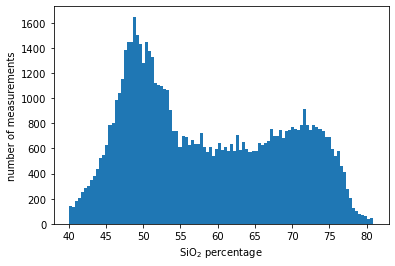

In [10]:
plt.hist(volcanic_data['SIO2'],bins=100)
plt.xlabel('SiO$_2$ percentage')
plt.ylabel('number of measurements')
plt.show()

Recall that instead of having the y-axis be number of values, we can have it be density using `density=True` (normalized to form a probability density, i.e., the area (or integral) under the histogram will sum to 1). Given that the count itself is rather arbitary, this can be an advantageous way to plot a distribution.

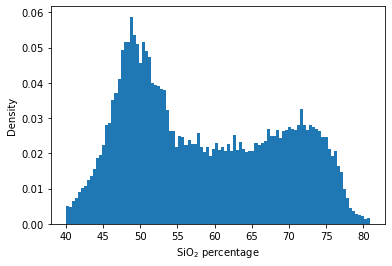

In [12]:
plt.hist(volcanic_data['SIO2'],bins=100,density=True)
plt.xlabel('SiO$_2$ percentage')
plt.ylabel('Density')
plt.show()

## Kernel density estimate

One of the ways of representing the distribution of a set of datapoints is known as the 'kernel density estimate'. This is a useful way of showing the distribution of data. It places a 'kernel' (generally a normal distribution) at each data point and then sums them up.  This avoids the awkwardness of needing to chose a bin size associated with histograms, for example.

Here is an illustration of how this works.

<img src="./images/kde.png" width = 600>
[Source: https://commons.wikimedia.org/wiki/File:Comparison_of_1D_histogram_and_KDE.png Wikimedia Creative Commons] 

There are two choices that are consequential when developing a kernel density estimate: the shape of the "kernel" and the bandwidth that sets the width of the kernel. The shape doesn't end up mattering too much, but the bandwidth very much does. There are "rules of thumb" for the bandwidth that are implemented as the defaults (and therefore often used), but these can be adjusted and it often isn't clear what the "right choice" is.

### Developing a kernel density estimate with ```kdeplot```

The seaborn function ```kdeplot``` generates a kernal density estimate and then plots it. Note that seaborn provides convenience wrapper functions around other scientific python packages. It is using matplotlib for plotting and it is using statsmodels, scipy and numpy for the statistical methods. It combines these into functions that can quickly get these tasks done. The default is a gaussian kernel and Scott's rule of thumb for the bandwidth.

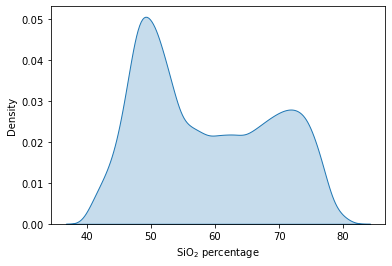

In [13]:
sns.kdeplot(volcanic_data['SIO2'],shade=True)
plt.xlabel('SiO$_2$ percentage')
plt.ylabel('Density')
plt.show()

The `sns.distplot` function will plot both a density-normalized histogram and a kernel density estimate curve.

/Users/ddreger/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


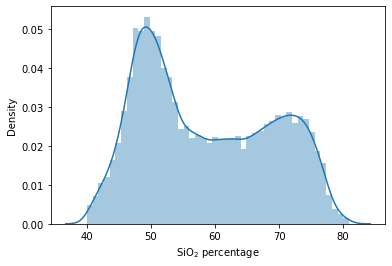

In [14]:
sns.distplot(volcanic_data['SIO2'])
plt.xlabel('SiO$_2$ percentage')
plt.ylabel('Density')
plt.show()

In [32]:
sns.displot?

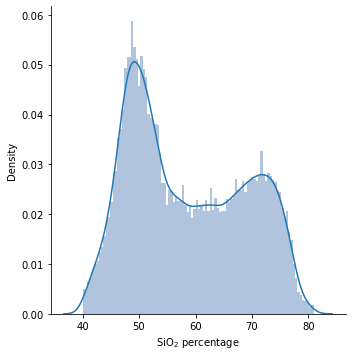

In [46]:
#How can we fix this warning?
sns.displot(volcanic_data['SIO2'],kind='kde')
plt.hist(volcanic_data['SIO2'],color='lightsteelblue',bins=100,density=True)
plt.xlabel('SiO$_2$ percentage')
plt.ylabel('Density')
plt.show()


## Making a bivariant histogram/scatter plot

If we want to investigate how another aspect of the chemistry of volcanic rocks relates to silica content we can use `sns.joinplot` to make a cross-plot. Here let's look at how iron content (FeO) relates to silica content.

/Users/ddreger/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


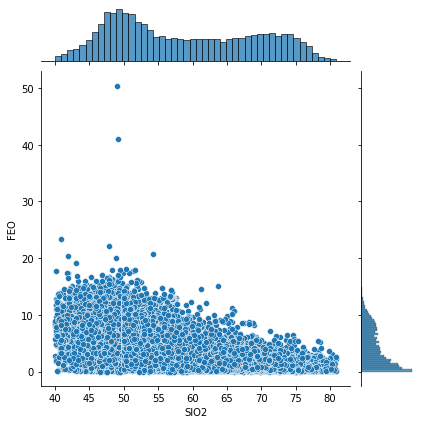

In [47]:
sns.jointplot(volcanic_data['SIO2'], volcanic_data['FEO'])
plt.show()

Pretty hard to see what is going on there. Perhaps it will be better if we change the y limit so that it is tighter on the data and make the symbols have a transparency.

In [ ]:
sns.jointplot(volcanic_data['SIO2'], volcanic_data['FEO'],...)
plt.ylim(...)
plt.show()

## Making a bivariant kernel density plot

Still pretty hard to see what is going on in the above plot, but it is an improvement. Let's put kernel density estimates to use. Here the same kernel density estimate is used and shown for the univariate data on each axis. However, we now have a bivariate kernel density estimate as well. Taken together we can see that there is a strong relationship between SiO$_2$ levels and FeO levels in volcanic rocks.

In [ ]:
sns.jointplot(volcanic_data['SIO2'], volcanic_data['FEO'],kind='kde')
plt.ylim(0,20)
plt.show()

## Mafic vs. felsic

This illustration provides an overview of the compositional difference between different types of igneous rocks:

<img src="./images/mafic_felsic.jpg" width = 600>

These compositional differences manifest in different material properties which can be observed at active volcanos.

## Evaluating compositional differences between mafic, intermediate and felsic volcanics (iron)

Let's first focus on the difference between the iron contenct 

In [ ]:
plt.hist(volcanic_data[volcanic_data['COMPOSITION']=='INTERMEDIATE']['FEO'],bins=100,density=True,label='intermediate volcanics')
plt.hist(volcanic_data[volcanic_data['COMPOSITION']=='FELSIC']['FEO'],bins=100,density=True,label='felsic volcanics')
plt.hist(volcanic_data[volcanic_data['COMPOSITION']=='MAFIC']['FEO'],bins=100,density=True,label='mafic volcanics')
plt.xlim(0,20)
plt.xlabel('FeO (%)')
plt.ylabel('density')
plt.legend()
plt.show()

sns.kdeplot(volcanic_data[volcanic_data['COMPOSITION']=='INTERMEDIATE']['FEO'],label='intermediate volcanics')
sns.kdeplot(volcanic_data[volcanic_data['COMPOSITION']=='FELSIC']['FEO'],label='felsic volcanics')
sns.kdeplot(volcanic_data[volcanic_data['COMPOSITION']=='MAFIC']['FEO'],label='mafic volcanics')
plt.xlim(0,20)
plt.xlabel('FeO (%)')
plt.ylabel('density')
plt.show()

## Other way to visualize the distributions

### The box plot

> A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range. *From seaborn docstring*

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x="COMPOSITION", y="FEO", data=volcanic_data, order=['FELSIC','INTERMEDIATE','MAFIC'])
plt.show()

### Violin plot

Perhaps you like box plots, but you are also have a new-found love of probability density estimates. Well you are in luck as the violin plot puts them both together.

In [ ]:
plt.figure(figsize=(8,8))
sns.violinplot(x="COMPOSITION", y="FEO", data=volcanic_data, order=['FELSIC','INTERMEDIATE','MAFIC'])
plt.ylim(0,20)
plt.show()

## Evaluating compositional differences between mafic, intermediate and felsic volcanics (sodium)

Looking at the this illustration of composition plot we see that it indicates that there is more iron in mafic rocks (which looks to be the case). It also indicated that there is more sodium in felsic rocks.

<img src="./images/mafic_felsic.jpg" width = 600>

**Code for you to write**

 Make the following plots to evaluate this assertion:

- jointplot of NA2O vs SI02 for the entire volcanic_data set. make one joint plot that is `kind='kde'` and one that is `kind='hex'`
- violin plot of NA2O categorized by composition

**Code for you to write**

Once you have made these visualizations, calculate the mean NA2O in felsic, intermediate and mafic volcanics. Assign these values to be `mafic_NA20_mean`, `intermediate_NA20_mean` and `felsic_NA20_mean` and print them.

Do these values fit with the schematic illustration of the felsic/mafic diagram? What is consistent and what isn't?

*write your answer here*

# A/B Testing 

> In modern data analytics, deciding whether two numerical samples come from the same underlying distribution is called A/B testing. The name refers to the labels of the two samples, A and B. 

> **The Hypotheses**

> We can try to answer this question by a test of hypotheses. The chance model that we will test says that there is no underlying difference in the popuations; the distributions in the samples are different just due to chance.

> Formally, this is the null hypothesis. We are going to have to figure out how to simulate a useful statistic under this hypothesis. But as a start, let's just state the two natural hypotheses.

*from https://www.inferentialthinking.com/chapters/12/1/AB_Testing.html*

In the example in Data 8, students are asked to consider the birth weight of babies when the mother was a smoker and when the mother was a nonsmoker. The two hypotheses and the test statistic were:

> **Null hypothesis**: In the population, the distribution of birth weights of babies is the same for mothers who don't smoke as for mothers who do. The difference in the sample is due to chance.

> **Alternative hypothesis**: In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers.

> **Test Statistic**

> The alternative hypothesis compares the average birth weights of the two groups and says that the average for the mothers who smoke is smaller. Therefore it is reasonable for us to use the difference between the two group means as our statistic.

> We will do the subtraction in the order "average weight of the smoking group  − average weight of the non-smoking group". Small values (that is, large negative values) of this statistic will favor the alternative hypothesis.

We can use this same approach in considering the sodium content of the lava samples. where the **Null hypothesis** is that sodium content is the same for rocks of different compositions and in difference in the sample is the result of chance. The **Alternative hypothesis** is that the sodium content of felsic lavas is, on average, higher.

## Testing the null hypothesis that there is no difference in the sodium content of **mafic and felsic** lavas

To start with, let's consider the difference between mafic and felsic lavas.

In [ ]:
volcanic_felsic_mafic = volcanic_data[...]
volcanic_felsic_mafic = pd.DataFrame(volcanic_felsic_mafic,columns=['COMPOSITION','SIO2','NA2O'])
volcanic_felsic_mafic = volcanic_felsic_mafic.dropna()
volcanic_felsic_mafic.tail()

In [ ]:
felsic_NA20_mean = np.mean(volcanic_felsic_mafic[volcanic_felsic_mafic['COMPOSITION']=='FELSIC']['NA2O'])
mafic_NA20_mean = np.mean(volcanic_felsic_mafic[volcanic_felsic_mafic['COMPOSITION']=='MAFIC']['NA2O'])

felsic_NA20_mean - mafic_NA20_mean

Let's define a function that can make this calculation and make a function for median difference too while we are at it:

In [ ]:
def difference_of_means(dataframe,value,category_column,category_values):
    '''
    Function to calculate the difference of mean from a dataframe.
    
    Parameters
    ----------
    dataframe : the pandas dataframe containing the data
    value : the column for which the mean will be calculated (a string)
    category_column : the column that will be used to categorize the data (a string)
    category_values : the values of the category (a list of strings)
    '''
    mean_1 = np.mean(dataframe[dataframe[category_column]==category_values[0]][value])
    mean_2 = np.mean(dataframe[dataframe[category_column]==category_values[1]][value])
    return mean_1 - mean_2

def difference_of_medians(dataframe,value,category_column,category_values):
    '''
    Function to calculate the difference of mean from a dataframe.
    
    Parameters
    ----------
    dataframe : the pandas dataframe containing the data
    value : the column for which the mean will be calculated (a string)
    category_column : the column that will be used to categorize the data (a string)
    category_values : the values of the category (a list of strings)
    '''
    median_1 = np.median(dataframe[dataframe[category_column]==category_values[0]][value])
    median_2 = np.median(dataframe[dataframe[category_column]==category_values[1]][value])
    return median_1 - median_2

In [ ]:
felsic_mafic_mean_diff = difference_of_means(volcanic_felsic_mafic,'NA2O','COMPOSITION',['FELSIC','MAFIC'])
felsic_mafic_mean_diff

In [ ]:
felsic_mafic_median_diff = difference_of_medians(volcanic_felsic_mafic,'NA2O','COMPOSITION',['FELSIC','MAFIC'])
felsic_mafic_median_diff

## Testing the null hypothesis through random permutation

The difference of the means suggests that the alternative hypothesis that felsic lavas have more sodium on average is true. How can we test that this is not the result of chance?

> **Predicting the Statistic Under the Null Hypothesis**

> To see how the statistic should vary under the null hypothesis, we have to figure out how to simulate the statistic under that hypothesis. A clever method based on random permutations does just that

If there were no difference between the two distributions in the underlying population, then whether the sodium content is from a mafic or a felsic rock should make no difference to the average. The idea, then, is to shuffle all the labels randomly among the rock samples. This is called random permutation.

In [ ]:
volcanic_felsic_mafic['COMPOSITION_Shuffled'] = np.random.permutation(volcanic_felsic_mafic['COMPOSITION'].values)
volcanic_felsic_mafic.tail()

In [ ]:
difference_of_means(volcanic_felsic_mafic,'NA2O','COMPOSITION_Shuffled',['FELSIC','MAFIC'])

The above difference is the result of one random permutation. We want to do many random permutations to test the hypothesis.

In [ ]:
dif_permuations_fel_maf_mean = []
dif_permuations_fel_maf_median = []

repetitions = 1000

for i in np.arange(repetitions):
    volcanic_felsic_mafic['COMPOSITION_Shuffled'] = np.random.permutation(volcanic_felsic_mafic['COMPOSITION'].values)
    
    new_mean_diff = difference_of_means(volcanic_felsic_mafic,'NA2O','COMPOSITION_Shuffled',['FELSIC','MAFIC'])
    dif_permuations_fel_maf_mean.append(new_mean_diff) 
    
    new_median_diff = difference_of_medians(volcanic_felsic_mafic,'NA2O','COMPOSITION_Shuffled',['FELSIC','MAFIC'])
    dif_permuations_fel_maf_median.append(new_median_diff) 

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(dif_permuations_fel_maf_mean,label='permutations')
plt.xlabel('Na$_2$O mean difference')

plt.subplot(1,2,2)
plt.hist(dif_permuations_fel_maf_median,label='permutations')
plt.xlabel('Na$_2$O median difference')

plt.show()

Notice how the distributions are centered around 0. This makes sense, because under the null hypothesis the two groups should have roughly the same average. Therefore the difference between the group averages should be around 0.

## Comparing the random permutations to the actual difference

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(dif_permuations_fel_maf_mean,label='permutations')
plt.scatter(felsic_mafic_mean_diff,0,color='red',zorder=1000,label='actual felsic-mafic')
plt.xlabel('Na$_2$O mean difference')
plt.legend()

plt.subplot(1,2,2)
plt.hist(dif_permuations_fel_maf_median,label='permutations')
plt.scatter(felsic_mafic_median_diff,0,color='red',zorder=1000,label='actual felsic-mafic')
plt.xlabel('Na$_2$O median difference')
plt.legend()
plt.show()

In [ ]:
mean_empirical_p = np.count_nonzero(dif_permuations_fel_maf_mean >= felsic_mafic_mean_diff) / repetitions
mean_empirical_p

In [ ]:
median_empirical_p = np.count_nonzero(dif_permuations_fel_maf_median >= felsic_mafic_median_diff) / repetitions
median_empirical_p

The empirical P-values are 0, meaning that none of the 5,000 permuted samples resulted in a difference that was as large as that which is observed in the actual samples. This is only an approximation. The exact chance of getting a difference in that range is not 0, but it is vanishingly small.

So it appears to be well-supported that felsic magmas have more Na$_2$O than mafic magmas.

## Testing the null hypothesis that there is no difference in the sodium content of **intermediate and felsic** lavas

In [ ]:
volcanic_felsic_int = volcanic_data[(volcanic_data['COMPOSITION']=='FELSIC') | (volcanic_data['COMPOSITION']=='INTERMEDIATE')]
volcanic_felsic_int = volcanic_felsic_int[(volcanic_felsic_int['SIO2'] < 64) & (volcanic_felsic_int['SIO2'] > 51)]
volcanic_felsic_int = pd.DataFrame(volcanic_felsic_int,columns=['COMPOSITION','SIO2','NA2O'])
volcanic_felsic_int = volcanic_felsic_int.dropna()
volcanic_felsic_int.tail()

**Code for you to write**

**Calculate the difference in the median and the difference in the mean between the NA2O of intermediate and felsic lavas. Assign them to variables and print them.**

In [ ]:
felsic_int_mean_diff = #complete the code

In [ ]:
felsic_int_median_diff = #complete the code

**Code for you to write**

**Shuffle the compositions within the `volcanic_felsic_int` dataframe. Do it 1000 times and make histogrames of the mean and median of these permutations that includes the actual median and mean that you calculated**

In [ ]:
dif_permuations_fel_int_mean = []
dif_permuations_fel_int_median = []

repetitions = 1000

for i in np.arange(repetitions):
    #complete the code

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
#complete the code

**Calculate the p-value for the median and mean**

**Shuffle the compositions within the `volcanic_felsic_int` dataframe. Do it 1000 times and make histogrames of the mean and median of these permutations that includes the actual median and mean that you calculated**

In [ ]:
empirical_p_mean = np.count_nonzero(dif_permuations_fel_int_mean >= felsic_int_mean_diff) / repetitions
empirical_p_mean

In [ ]:
empirical_p_median = np.count_nonzero(dif_permuations_fel_int_median >= felsic_int_median_diff) / repetitions
empirical_p_median

### Turn in the Notebook

**Export as HTML and upload to bCourses.**